# Insurance Charge

In [1]:
# import dataset

import pandas as pd
df = pd.read_csv('insurance.csv')

In [2]:
# explore the dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Data Cleaning
- There is no missing value, as you can see all the variable have the same non-null counts.
- Conver Data type >> one hot encoding for nominal variables, no problem with numeric variables.
    * continous variable: age, bmi, charges
    * discrete variable: children
    * nominal variable: gender, smoker
 

In [20]:
# get dummy for categorical variable
df = pd.get_dummies(df, drop_first=True)

In [21]:
df

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


## Data Visualisation

In [6]:
# data visualisation
import matplotlib.pyplot as plt
import seaborn as sn

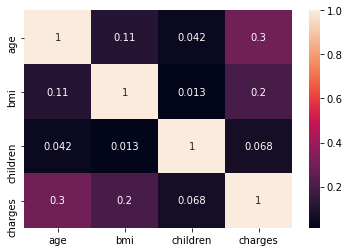

In [24]:
corrMatrix = df[['age', 'bmi', 'children', 'charges']].corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

From correlation matrix above, it appear that there is no highly correlated variable.
[Correlation Matrix Source](https://datatofish.com/correlation-matrix-pandas/)

## Model
- dependent variable: charges
- independent variable: age, bmi, children, gender, smoker
- model: simple linear regression

[source](https://www.statsmodels.org/stable/user-guide.html#time-series-analysis)

In [27]:
import statsmodels.api as sm
import numpy as np
Y = df['charges']
X = df.drop(['charges'], axis = 1)
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()

In [29]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Wed, 27 Oct 2021   Prob (F-statistic):               0.00
Time:                        02:34:05   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.194e+04    987.819  

Variable Statistically significant at alpha 0.05,
- age
- bmi
- children
- smoker_yes
- region_southeast
- region_southwest

interpretation
- if age increased by one, insurance charges will increase by 256.8564.
- if bmi increased by one, insurance charges will increase by 330.1935.
- if policy holder has more child, insurance charges will increase by 475.50.
- if policy holder is smoker, insurance charges will increase by 2.386 * 10^4 = 23860.
- if policy holder live in southeast, insurance charges will be less than living in northeast 1035.0220.
- if policy holder live in southwest, insurance charges will be less than living in northeast 960.0510.

R-square is 0.751. It is showed that the regression model fits the observated data by reveals 75.1% of all data.

### Model Performance

Assumption of linear regression
- linearity: linear relationship between X and mean Y
- homoscedasticity: the variance of residual is the same for any value oof X
- independence: observations are independent from each others (check collelation matrix before)
- normalitity: error need be normality distributed

[source](https://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/R/R5_Correlation-Regression/R5_Correlation-Regression4.html)


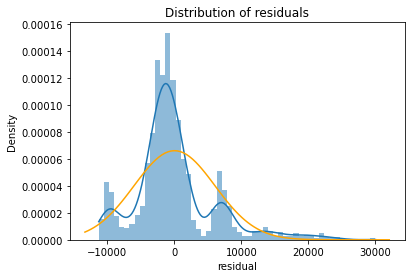

In [45]:
from scipy import stats
mu, std = stats.norm.fit(results.resid)
mu, std

# check normality of error
fig, ax = plt.subplots()
# plot the residuals
sn.histplot(x=results.resid, ax=ax, stat="density", linewidth=0, kde=True)
ax.set(title="Distribution of residuals", xlabel="residual")

# plot corresponding normal curve
xmin, xmax = plt.xlim() # the maximum x values from the histogram above
x = np.linspace(xmin, xmax, 100) # generate some x values
p = stats.norm.pdf(x, mu, std) # calculate the y values for the normal curve
sn.lineplot(x=x, y=p, color="orange", ax=ax)
plt.show()

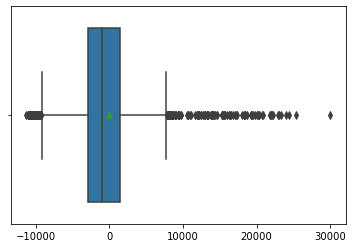

In [40]:
sn.boxplot(x=results.resid, showmeans=True);

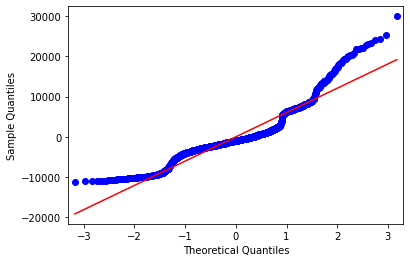

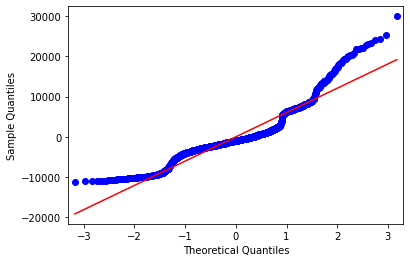

In [37]:
sm.qqplot(results.resid, line = 's')

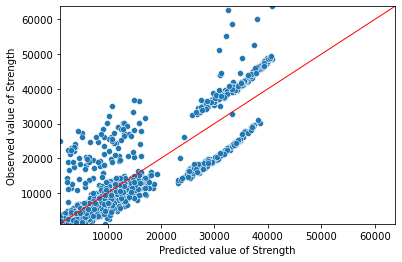

In [39]:
Y_max = Y.max()
Y_min = Y.min()

ax = sn.scatterplot(x=results.fittedvalues, y=Y)
ax.set(ylim=(Y_min, Y_max))
ax.set(xlim=(Y_min, Y_max))
ax.set_xlabel("Predicted value of Strength")
ax.set_ylabel("Observed value of Strength")

X_ref = Y_ref = np.linspace(Y_min, Y_max, 100)
plt.plot(X_ref, Y_ref, color='red', linewidth=1)
plt.show()